## Evaluate VAE (Encoder/Decoder quality)

The dataset used here is used later for training the RL agent, so we can perform a direct comparison between the results here and the results obtained from RL

In [13]:
from config import Config
from data_prep import DataPrep
from env import CMAPSSEnv

const = Config()
neurons = const.VAE_neurons

# Data prep
data = DataPrep(file = const.file_path,
                num_settings = const.num_settings,
                num_sensors = const.num_sensors,
                num_units = const.num_units[2],
                prev_step_units = const.prev_step_units[2],
                step = const.step[2],
                normalization_type="01")

df = data.ReadData()

df

,Unit,NormTime,OpSetting1,OpSetting2,OpSetting3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,...,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21
0,241,0.994536,0.595099,0.736342,0.000000,0.238089,0.010311,0.051374,0.010265,0.293184,...,0.088637,0.001434,0.060915,0.915211,0.000000,0.031915,0.000000,0.000000,0.136864,0.142847
1,241,0.989071,0.797537,0.866983,0.500000,0.119044,0.069186,0.169524,0.118271,0.146592,...,0.046033,0.497339,0.317294,0.649844,0.000000,0.159574,0.313953,0.500000,0.074450,0.075873
2,241,0.983607,0.531704,0.578385,0.666667,0.412696,0.374609,0.425394,0.390998,0.431061,...,0.363260,0.662724,0.448039,0.447256,0.333333,0.421986,0.542636,0.666667,0.378496,0.379220
3,241,0.978142,0.607066,0.683462,0.750000,0.324589,0.326804,0.400715,0.350109,0.359944,...,0.306074,0.745396,0.469197,0.421620,0.250000,0.393617,0.569767,0.750000,0.321871,0.322735
4,241,0.972678,0.580878,0.713040,0.800000,0.385069,0.393832,0.450217,0.390350,0.389542,...,0.339242,0.795070,0.481208,0.403995,0.200000,0.438298,0.628753,0.800000,0.354746,0.357522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4359,260,0.012658,0.570459,0.676921,0.856651,0.377519,0.407050,0.485114,0.434381,0.385261,...,0.348738,0.851558,0.553917,0.356251,0.338991,0.472902,0.666887,0.856651,0.363661,0.364554
4360,260,0.009494,0.570383,0.676835,0.856684,0.377569,0.407105,0.485173,0.434449,0.385314,...,0.348799,0.851591,0.554019,0.356204,0.339142,0.472964,0.666930,0.856684,0.363719,0.364613
4361,260,0.006329,0.570389,0.676848,0.856488,0.377537,0.407016,0.485082,0.434364,0.385293,...,0.348739,0.851397,0.553963,0.356352,0.339065,0.472870,0.666777,0.856488,0.363666,0.364561
4362,260,0.003165,0.570394,0.676862,0.856292,0.377505,0.406927,0.484989,0.434285,0.385272,...,0.348679,0.851204,0.553907,0.356499,0.338987,0.472779,0.666624,0.856292,0.363613,0.364506


In [14]:
# List of engine lifetimes
engine_lives = df.groupby(df['Unit']).size().tolist()
num_engines = len(engine_lives)

In [15]:
# Load encoder and decoder
import tensorflow as tf

encoder = tf.keras.models.load_model("./saved_models/encoder", compile=False)
decoder = tf.keras.models.load_model("./saved_models/decoder", compile=False)

total_encoded_data = encoder.predict(df.iloc[:,1:], verbose=0)
total_decoded_data = decoder.predict(total_encoded_data, verbose=0)

In [16]:
total_encoded_data[0]

array([0.9780978, 0.9858045], dtype=float32)

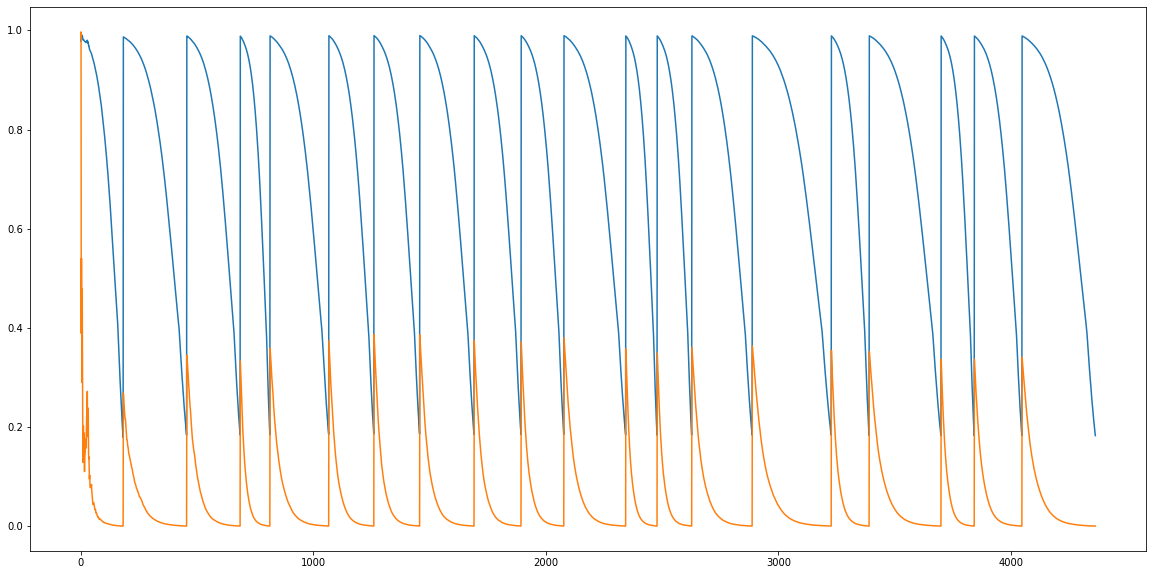

In [17]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

plt.plot(total_encoded_data)

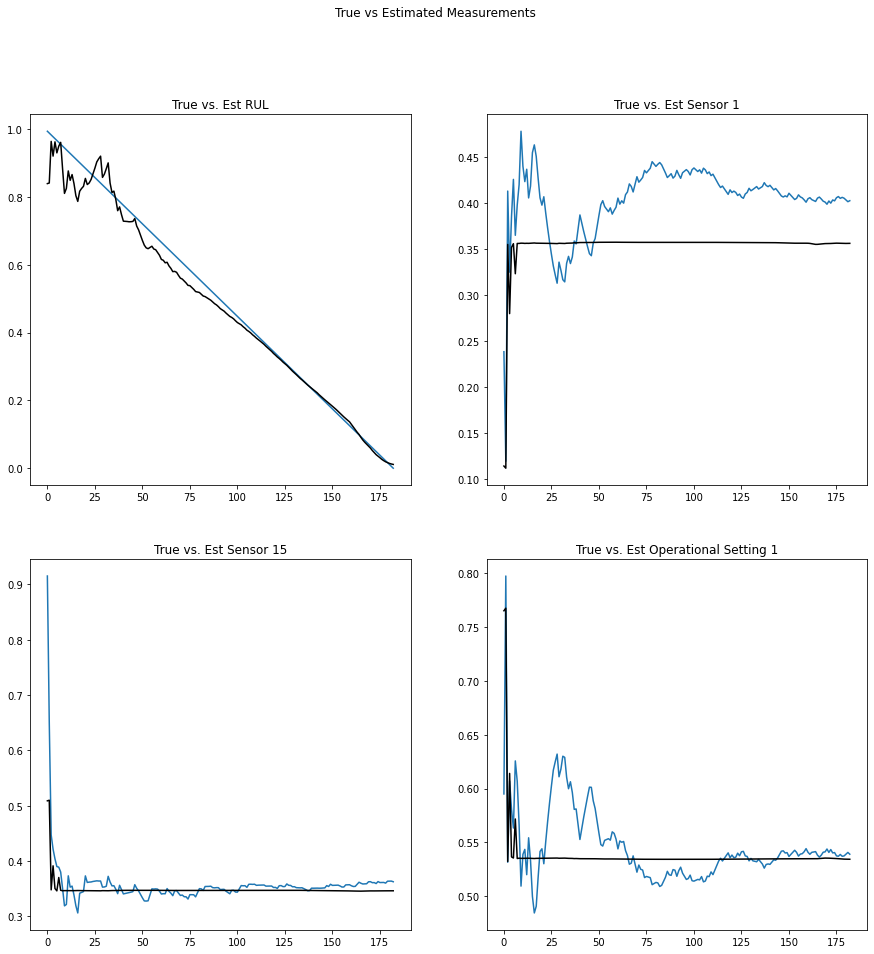

In [18]:
import pandas as pd

decoded_df = pd.DataFrame(total_decoded_data, columns = df.columns[1:])

fig, axs = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle('True vs Estimated Measurements')
plt.rcParams["figure.figsize"] = (10,10)

axs[0, 0].plot(df['NormTime'].iloc[0:engine_lives[0]])
axs[0, 0].plot(decoded_df['NormTime'].iloc[0:engine_lives[0]], color='black')
axs[0, 0].title.set_text('True vs. Est RUL')

axs[0, 1].plot(df['Sensor1'].iloc[0:engine_lives[0]])
axs[0, 1].plot(decoded_df['Sensor1'].iloc[0:engine_lives[0]], color='black')
axs[0, 1].title.set_text('True vs. Est Sensor 1')

axs[1, 0].plot(df['Sensor15'].iloc[0:engine_lives[0]])
axs[1, 0].plot(decoded_df['Sensor15'].iloc[0:engine_lives[0]], color='black')
axs[1, 0].title.set_text('True vs. Est Sensor 15')

axs[1, 1].plot(df['OpSetting1'].iloc[0:engine_lives[0]])
axs[1, 1].plot(decoded_df['OpSetting1'].iloc[0:engine_lives[0]], color='black')
axs[1, 1].title.set_text('True vs. Est Operational Setting 1')

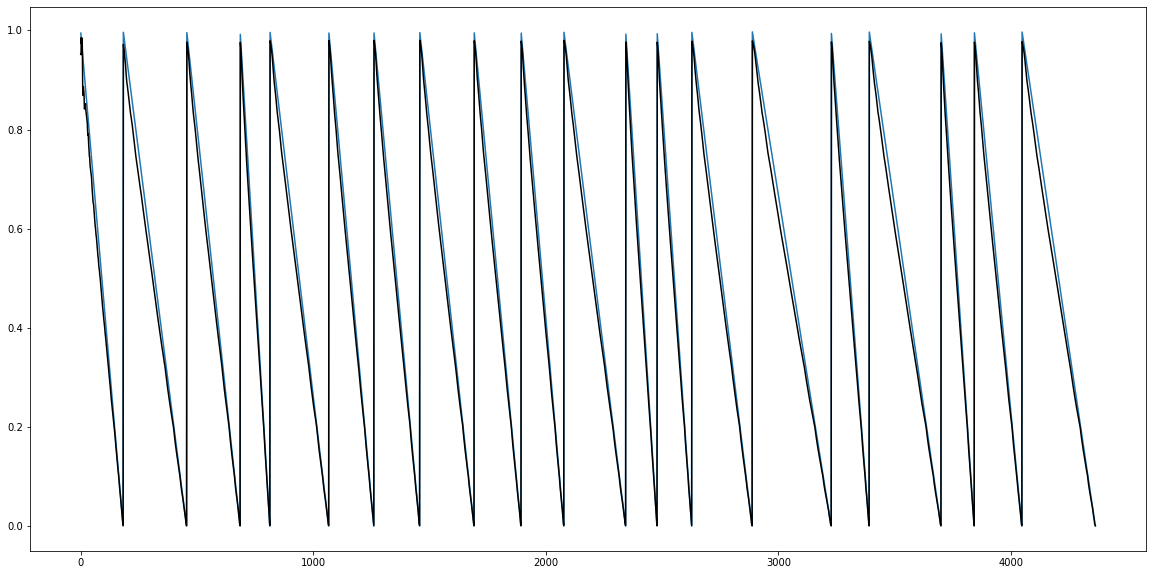

In [6]:
plt.rcParams["figure.figsize"] = (20,10)

plt.plot(df['NormTime'])
plt.plot(decoded_df['NormTime'], color='black')

## Sequential plotting

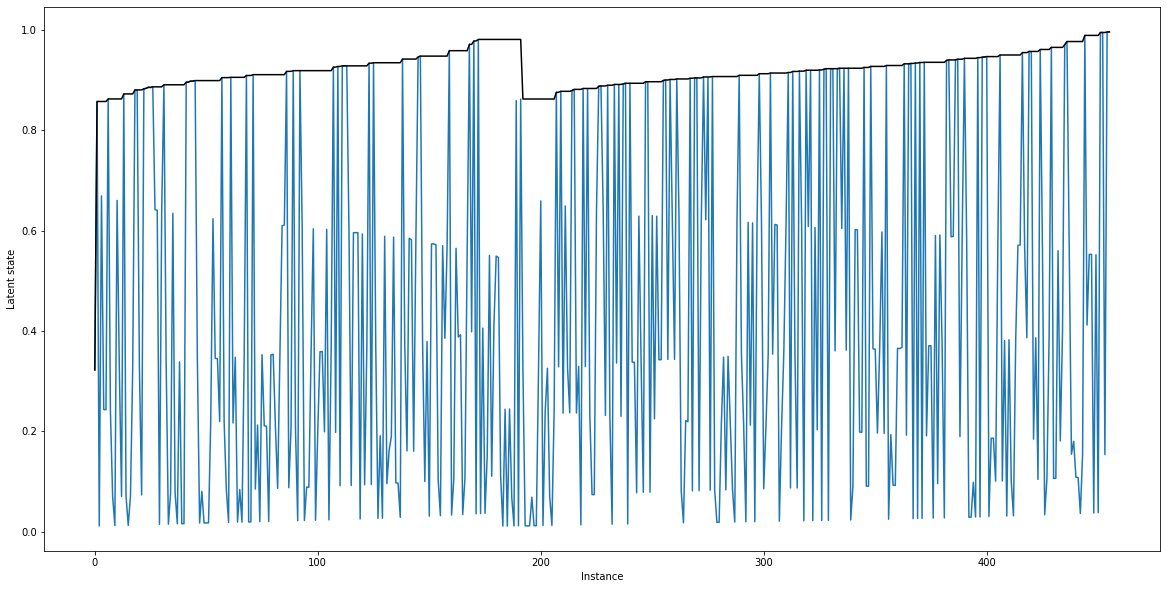

In [14]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

import numpy as np

plt.rcParams["figure.figsize"] = (20,10)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ylabel("Evaluation set size")

x_eval = []
avg_x_val = []

for i in range(len(df[:np.cumsum(engine_lives[:2])[-1]])):
    encoded_data = encoder.predict(tf.reshape(df.iloc[i,1:], [1, -1]), verbose=0)[0]
    decoded_data = decoder.predict(encoded_data, verbose=0)

    x_eval.append(encoded_data[0])
    avg_x_val.append(np.max(x_eval[-20:]))
    
    ax.cla()
    ax.plot(x_eval)
    ax.plot(avg_x_val, color='black')
    ax.set_xlabel('Instance')
    ax.set_ylabel('Latent state')
    display(fig)
    clear_output(wait=True)
    plt.pause(0.001)